In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import re
import nltk
import string
import nlp_utils
import contractions
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import PorterStemmer, LancasterStemmer, SnowballStemmer

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score, auc, confusion_matrix, roc_auc_score, roc_curve, recall_score
from sklearn.metrics import classification_report

In [4]:
# Loading data.
df=pd.read_csv('Spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
# Dropping unneccessary columns.
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [6]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [7]:
# There are 5572 rows  and 2 columns.

In [8]:
# Renaming columns.
df= df.rename(columns={'v1': 'target','v2':'text'})

In [9]:
df

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
df['clean_text']= df['text'].apply(nlp_utils.lemmatization_sentence)

In [11]:
df

,target,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy.. available only i...
1,ham,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor ... u c already then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he go to usf he live around...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this be the 2nd time we have try 2 contact u. ...
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b go to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity be in mood for that so ... any other sugg...
5570,ham,The guy did some bitching but I acted like i'd...,the guy do some bitching but i act like i woul...


# 1.Tokenization.

In [12]:
corpus=df['clean_text']

In [13]:
def clean_nda(corpus):
    tokens = nlp_utils.w_tokenization(corpus)

In [14]:
corpus

0       go until jurong point crazy.. available only i...
1                           ok lar ... joke wif u oni ...
2       free entry in 2 a wkly comp to win fa cup fina...
3       u dun say so early hor ... u c already then sa...
4       nah i do not think he go to usf he live around...
                              ...                        
5567    this be the 2nd time we have try 2 contact u. ...
5568                    will ì_ b go to esplanade fr home
5569    pity be in mood for that so ... any other sugg...
5570    the guy do some bitching but i act like i woul...
5571                              rofl it true to it name
Name: clean_text, Length: 5572, dtype: object

# 2. Removing Special Characters.

In [15]:
def clean_special(corpus):

    return re.sub(r'[^a-z0-9 ]','',corpus)

In [16]:
corpus = corpus.apply(clean_special)

In [17]:
corpus

0       go until jurong point crazy available only in ...
1                                 ok lar  joke wif u oni 
2       free entry in 2 a wkly comp to win fa cup fina...
3           u dun say so early hor  u c already then say 
4       nah i do not think he go to usf he live around...
                              ...                        
5567    this be the 2nd time we have try 2 contact u u...
5568                      will  b go to esplanade fr home
5569    pity be in mood for that so  any other suggestion
5570    the guy do some bitching but i act like i woul...
5571                              rofl it true to it name
Name: clean_text, Length: 5572, dtype: object

# 2a. Removing numeric,alphnumerics and decimals.

In [18]:
def num_dec_al(word):
    if word.isnumeric():
        return 'xxxxxx'
    elif word.isdecimal():
        return 'xxx...'
    elif word.isalpha():
        return word
    else:
        return 'xxxaaa'

In [19]:
def clean_nda(corpus):
    tokens = nlp_utils.w_tokenization(corpus)
    map_list = list(map(num_dec_al,tokens))
    return " ".join(map_list)

In [20]:
corpus_nda = list(map(clean_nda,corpus))

In [21]:
corpus_nda

['go until jurong point crazy available only in bugis n great world la e buffet cine there get amore wat',
 'ok lar joke wif u oni',
 'free entry in xxxxxx a wkly comp to win fa cup final tkts xxxaaa may xxxxxx text fa to xxxxxx to receive entry question std txt rate t c s apply xxxaaa s',
 'u dun say so early hor u c already then say',
 'nah i do not think he go to usf he live around here though',
 'freemsg hey there darling it be be xxxxxx week s now and no word back i would like some fun you up for it still tb ok xxx std chgs to send xxxxxx to rcv',
 'even my brother be not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam have be set a your callertune for all caller press xxxxxx to copy your friend callertune',
 'winner a a value network customer you have be select to receivea xxxxxx prize reward to claim call xxxxxx claim code xxxaaa valid xxxxxx hour only',
 'have your mobile xxxxxx month or more u r entitle 

# 3. Expanding Contractions and lower case.

In [22]:
conm = contractions.CONTRACTION_MAP
def contraction_remove(corpus_nda):
    for key,value in conm.items():
        corpus_nda = re.sub(r"{}".format(key),'{}'.format(value),corpus_nda)
        
    return corpus_nda

In [23]:
special = string.punctuation
def w_tokenization(corpus_nda):
    # convert into lower case
    corpus_nda = corpus_nda.lower()
    # contraction
    corpus_nda = contraction_remove(corpus_nda)
    # 
    tokens = nltk.word_tokenize(corpus_nda) # word tokens
    # step-1: compare
    without_special = []
    for word in tokens:
        if word not in special:
            without_special.append(word)

    return without_special

In [24]:
corpus_nda

['go until jurong point crazy available only in bugis n great world la e buffet cine there get amore wat',
 'ok lar joke wif u oni',
 'free entry in xxxxxx a wkly comp to win fa cup final tkts xxxaaa may xxxxxx text fa to xxxxxx to receive entry question std txt rate t c s apply xxxaaa s',
 'u dun say so early hor u c already then say',
 'nah i do not think he go to usf he live around here though',
 'freemsg hey there darling it be be xxxxxx week s now and no word back i would like some fun you up for it still tb ok xxx std chgs to send xxxxxx to rcv',
 'even my brother be not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam have be set a your callertune for all caller press xxxxxx to copy your friend callertune',
 'winner a a value network customer you have be select to receivea xxxxxx prize reward to claim call xxxxxx claim code xxxaaa valid xxxxxx hour only',
 'have your mobile xxxxxx month or more u r entitle 

# 4. Handling Stopwords, Stemming and Lemmatization.

In [25]:
def stemming(corpus_nda):
    tokens = w_tokenization(corpus_nda)
    stem_words = []
    for w in tokens:
        stem_words.append(snow.stem(w))

    return " ".join(stem_words)

In [26]:
lemma = WordNetLemmatizer() # initilizing word net
def lemmatization_sentence(corpus_nda,stopwords,stop=True):
    # computing parts of speech
    tokens = w_tokenization(corpus_nda)
    tag_list = pos_tag(tokens,tagset=None)
    lema_sent =[] # initizaing empty list

    for token,pos_token in tag_list:
        #if token not in stopwords:

        if pos_token.startswith('V'): # verb
            pos_val = 'v'
        elif pos_token.startswith('J'): # adjective
            pos_val = 'a'
        elif pos_token.startswith('R'): # adverb
            pos_val = 'r'
        else:# any parts of speech except verb, adjective, adverb
            pos_val = 'n'

        lema_token = lemma.lemmatize(token,pos_val) # computing lematization
        lema_sent.append(lema_token) # append values in list
    return " ".join(lema_sent)

In [27]:
corpus_nda

['go until jurong point crazy available only in bugis n great world la e buffet cine there get amore wat',
 'ok lar joke wif u oni',
 'free entry in xxxxxx a wkly comp to win fa cup final tkts xxxaaa may xxxxxx text fa to xxxxxx to receive entry question std txt rate t c s apply xxxaaa s',
 'u dun say so early hor u c already then say',
 'nah i do not think he go to usf he live around here though',
 'freemsg hey there darling it be be xxxxxx week s now and no word back i would like some fun you up for it still tb ok xxx std chgs to send xxxxxx to rcv',
 'even my brother be not like to speak with me they treat me like aid patent',
 'a per your request melle melle oru minnaminunginte nurungu vettam have be set a your callertune for all caller press xxxxxx to copy your friend callertune',
 'winner a a value network customer you have be select to receivea xxxxxx prize reward to claim call xxxxxx claim code xxxaaa valid xxxxxx hour only',
 'have your mobile xxxxxx month or more u r entitle 

# 5. WordEmbeddings using Count-Vectorizer.

In [28]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [29]:
cv1 = CountVectorizer(max_features=13) # bag of words

In [30]:
bow = cv1.fit_transform(corpus_nda)

In [31]:
X_bow = bow.toarray()

In [32]:
X_bow.shape

(5572, 13)

In [33]:
col = cv1.get_feature_names()

In [34]:
df_x = pd.DataFrame(X_bow,columns=col)

In [35]:
df_x

,and,be,do,have,in,it,me,not,the,to,xxxaaa,xxxxxx,you
0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,3,2,3,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5567,0,2,0,2,0,0,0,0,2,0,3,4,0
5568,0,0,0,0,0,0,0,0,0,1,0,0,0
5569,0,1,0,0,1,0,0,0,0,0,0,0,0
5570,1,1,1,0,1,1,0,0,1,1,0,0,0


In [36]:
y = df['target']

In [37]:
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: target, Length: 5572, dtype: object

In [38]:
df_x.head()

,and,be,do,have,in,it,me,not,the,to,xxxaaa,xxxxxx,you
0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,3,2,3,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,1,0,1,0,0,0


In [39]:
corpus_nda[9]

'have your mobile xxxxxx month or more u r entitle to update to the late colour mobile with camera for free call the mobile update co free on xxxxxx'

# 5a. WordEmbeddings using TF-IDF Vectorizer. 

In [40]:
tfidf = TfidfVectorizer(max_features=13)

In [41]:
tf_vector = tfidf.fit_transform(corpus_nda)

In [42]:
x_tfidf = tf_vector.toarray()

In [43]:
df_x_tfidf = pd.DataFrame(x_tfidf,columns=tfidf.get_feature_names())

In [44]:
df_x_tfidf.head(1)

,and,be,do,have,in,it,me,not,the,to,xxxaaa,xxxxxx,you
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Checking if the dataset is balanced or not.

In [45]:
df['target'].value_counts()/len(df)

ham     0.865937
spam    0.134063
Name: target, dtype: float64

In [46]:
df['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

### There are 4825 hams and 747 spams, the data is totally imbalanced and needs to be balanced.

In [47]:
df=df.replace({'0':'ham','1':'spam'})

In [48]:
df

,target,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy.. available only i...
1,ham,Ok lar... Joking wif u oni...,ok lar ... joke wif u oni ...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,u dun say so early hor ... u c already then sa...
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah i do not think he go to usf he live around...
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,this be the 2nd time we have try 2 contact u. ...
5568,ham,Will Ì_ b going to esplanade fr home?,will ì_ b go to esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity be in mood for that so ... any other sugg...
5570,ham,The guy did some bitching but I acted like i'd...,the guy do some bitching but i act like i woul...


In [49]:
target=df['target']

ham: 4825
spam: 747
Proportion: 6.46 : 1


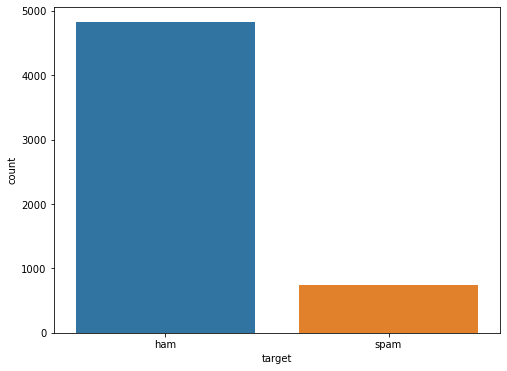

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(target)

target_count = target.value_counts()
print('ham:', target_count[0])
print('spam:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')


In [51]:
ham_msg = target[target =='ham']
spam_msg =target[target=='spam']

In [52]:
ham_msg.shape,spam_msg.shape

((4825,), (747,))

# Downsampling 'Hams'.

In [53]:
# one way to fix it is to downsample the ham msg
ham_msg_df = ham_msg.sample(n = len(spam_msg), random_state = 44)
spam_msg_df = spam_msg
print(ham_msg_df.shape, spam_msg_df.shape)

(747,) (747,)


Text(0.5, 0, 'Message types')

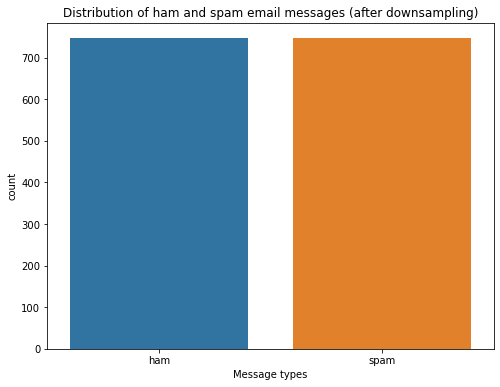

In [54]:
# Create a dataframe with these ham and spam msg
msg_df = ham_msg_df.append(spam_msg_df).reset_index(drop=True)
plt.figure(figsize=(8,6))
sns.countplot(msg_df)
plt.title('Distribution of ham and spam email messages (after downsampling)')
plt.xlabel('Message types')

In [55]:
# Now the imbalance from the target variable has been removed.

In [56]:
msg_df.head(10)

0    ham
1    ham
2    ham
3    ham
4    ham
5    ham
6    ham
7    ham
8    ham
9    ham
Name: target, dtype: object

In [57]:
msg_df.tail(10)

1484    spam
1485    spam
1486    spam
1487    spam
1488    spam
1489    spam
1490    spam
1491    spam
1492    spam
1493    spam
Name: target, dtype: object

In [58]:
msg_df.value_counts()

ham     747
spam    747
Name: target, dtype: int64

In [59]:
msg_df.shape

(1494,)

In [60]:
msg_df=msg_df.values.reshape(-1,1)

In [61]:
Y=msg_df

# Now the TF-IDF(Clean_text) has to be resampled as well. 

In [62]:
X_tf=df_x_tfidf

In [63]:
X_tf.shape

(5572, 13)

In [64]:
X = X_tf.sample(n = len(msg_df), random_state = 44)
print(X.shape)

(1494, 13)


In [65]:
X.shape

(1494, 13)

In [66]:
Y.shape

(1494, 1)

In [67]:
X

,and,be,do,have,in,it,me,not,the,to,xxxaaa,xxxxxx,you
5243,0.0,0.000000,0.638928,0.000000,0.000000,0.0,0.652828,0.329516,0.000000,0.000000,0.000000,0.000000,0.238758
2572,0.0,0.212697,0.000000,0.000000,0.335174,0.0,0.000000,0.000000,0.917834,0.000000,0.000000,0.000000,0.000000
4466,0.0,0.000000,0.539877,0.000000,0.526821,0.0,0.000000,0.000000,0.480878,0.000000,0.000000,0.446933,0.000000
4009,0.0,0.093982,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.110503,0.453281,0.879485,0.000000
2021,0.0,0.000000,0.324503,0.625092,0.000000,0.0,0.000000,0.669428,0.000000,0.236270,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3019,0.0,0.000000,0.407331,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.913281
4167,0.0,0.118720,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.763460,0.634850,0.000000
829,0.0,0.297288,0.000000,0.462394,0.000000,0.0,0.000000,0.000000,0.427620,0.000000,0.000000,0.000000,0.717602
2623,0.0,0.598984,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.800761,0.000000


In [68]:
Y.shape

(1494, 1)

# Splitting the Data.

In [69]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0, shuffle=True)

# Logistic Regression.

In [70]:
log_reg = LogisticRegression().fit(X_train, Y_train)

#predict on train 
train_preds = log_reg.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds))

#predict on test
test_preds = log_reg.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds))
print('-'*50)
 
#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds))

C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Model accuracy on train is:  0.5330143540669856
Model accuracy on test is:  0.5100222717149221
--------------------------------------------------
confusion_matrix train is:  [[207 313]
 [175 350]]
confusion_matrix test is:  [[ 92 135]
 [ 85 137]]


In [71]:
print(classification_report(Y_test,test_preds))

              precision    recall  f1-score   support

         ham       0.52      0.41      0.46       227
        spam       0.50      0.62      0.55       222

    accuracy                           0.51       449
   macro avg       0.51      0.51      0.51       449
weighted avg       0.51      0.51      0.50       449



In [72]:
accuracy_score(Y_test,test_preds)

0.5100222717149221

# NaiveBayes.

In [73]:
#fit the model on train data 
NB=GaussianNB()
NB.fit(X_train,Y_train)

#predict on train 
train_preds2 = NB.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = NB.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds2))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds2))

Model accuracy on train is:  0.5311004784688995
Model accuracy on test is:  0.5278396436525612
--------------------------------------------------
confusion_matrix train is:  [[163 357]
 [133 392]]
confusion_matrix test is:  [[ 77 150]
 [ 62 160]]


C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [74]:
print(classification_report(Y_test,test_preds2))

              precision    recall  f1-score   support

         ham       0.55      0.34      0.42       227
        spam       0.52      0.72      0.60       222

    accuracy                           0.53       449
   macro avg       0.54      0.53      0.51       449
weighted avg       0.54      0.53      0.51       449



# Decision Tree.

In [75]:
#fit the model on train data 
DT = DecisionTreeClassifier().fit(X_train, Y_train)

#predict on train 
train_preds3 = DT.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

#predict on test
test_preds3 = DT.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds3))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds3))

Model accuracy on train is:  0.7741626794258373
Model accuracy on test is:  0.4766146993318486
--------------------------------------------------
confusion_matrix train is:  [[442  78]
 [158 367]]
confusion_matrix test is:  [[113 114]
 [121 101]]


In [76]:
print(classification_report(Y_test,test_preds3))

              precision    recall  f1-score   support

         ham       0.48      0.50      0.49       227
        spam       0.47      0.45      0.46       222

    accuracy                           0.48       449
   macro avg       0.48      0.48      0.48       449
weighted avg       0.48      0.48      0.48       449



# Random Forest.

In [77]:
#fit the model on train data 
RF=RandomForestClassifier().fit(X_train,Y_train)
#predict on train 
train_preds4 = RF.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds4))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds4))

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Model accuracy on train is:  0.7741626794258373
Model accuracy on test is:  0.4610244988864143
--------------------------------------------------
confusion_matrix train is:  [[421  99]
 [137 388]]
confusion_matrix test is:  [[109 118]
 [124  98]]


In [78]:
print(classification_report(Y_test,test_preds4))

              precision    recall  f1-score   support

         ham       0.47      0.48      0.47       227
        spam       0.45      0.44      0.45       222

    accuracy                           0.46       449
   macro avg       0.46      0.46      0.46       449
weighted avg       0.46      0.46      0.46       449



# K-Nearest Neighbours.

In [79]:
#fit the model on train data 
KNN = KNeighborsClassifier().fit(X_train,Y_train)
#predict on train 
train_preds5 = KNN.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds5))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds5))

C:\Users\Rahul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


Model accuracy on train is:  0.631578947368421
Model accuracy on test is:  0.48997772828507796
--------------------------------------------------
confusion_matrix train is:  [[295 225]
 [160 365]]
confusion_matrix test is:  [[102 125]
 [104 118]]


In [80]:
print(classification_report(Y_test,test_preds5))

              precision    recall  f1-score   support

         ham       0.50      0.45      0.47       227
        spam       0.49      0.53      0.51       222

    accuracy                           0.49       449
   macro avg       0.49      0.49      0.49       449
weighted avg       0.49      0.49      0.49       449



# Support Vector Machine.

In [81]:
#fit the model on train data 
SVM = SVC(kernel='linear')
SVM.fit(X_train, Y_train)

#predict on train 
train_preds6 = SVM.predict(X_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds6))

#predict on test
test_preds6 = SVM.predict(X_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds6))
print('-'*50)

#Confusion matrix
print("confusion_matrix train is: ", confusion_matrix(Y_train, train_preds6))
print("confusion_matrix test is: ", confusion_matrix(Y_test, test_preds6))

Model accuracy on train is:  0.5368421052631579
Model accuracy on test is:  0.5144766146993318
--------------------------------------------------
confusion_matrix train is:  [[151 369]
 [115 410]]
confusion_matrix test is:  [[ 68 159]
 [ 59 163]]


C:\Users\Rahul\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [82]:
print(classification_report(Y_test,test_preds6))

              precision    recall  f1-score   support

         ham       0.54      0.30      0.38       227
        spam       0.51      0.73      0.60       222

    accuracy                           0.51       449
   macro avg       0.52      0.52      0.49       449
weighted avg       0.52      0.51      0.49       449



# NaiveBayes, Logistic Regression, and K-Nearest Neighbours models have performed well compared to other models.

### Testing on new string.

In [83]:
input_text='Send me the email as it is urgent for me as i have to submit the file'

In [84]:
# step-1: nlp_utils.lemmatization_sentence
cleaned = nlp_utils.lemmatization_sentence(input_text)
# step-2: 
cleaned = clean_nda(cleaned)

In [85]:
tfidf1 = TfidfVectorizer()

In [86]:
input_vector = tfidf1.fit_transform([input_text])

In [87]:
input_tfidf = input_vector.toarray()

In [88]:
df_input_tfidf = pd.DataFrame(input_tfidf,columns=tfidf1.get_feature_names())
df_input_tfidf.head()

,as,email,file,for,have,is,it,me,send,submit,the,to,urgent
0,0.426401,0.213201,0.213201,0.213201,0.213201,0.213201,0.213201,0.426401,0.213201,0.213201,0.426401,0.213201,0.213201


In [89]:
prediction = log_reg.predict(df_input_tfidf)

In [90]:
prediction

array(['ham'], dtype=object)